# ***Credit Card Fraud Detection***

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from posixpath import split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

**Loading data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CODSOFT/creditcard.csv')
df

Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
13949  24754  1.252924 -0.182189 -0.802716 -0.210981  1.916713  3.643624   
13950  24756 -0.346979 -2.103284 -0.685061  1.961605 -0.401125  0.473632   
13951  24759 -6.053652 -5.988723  0.810413 -0.011811  1.308135 -0.590803   
13952  24759  1.169121 -1.284945  0.032717 -0.681670  0.660598  4.412578   
13953  24759 -6.917152  5.854171 -1.652458 -1.488884 -0.833891 -0.344418   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1     -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2      0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3      0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4      0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...         ...       ...       ...  ...       ...       ...       ...   
13949 -0.778711  0.818295  1.706962  ... -0.497088 -1.211285  0.043809   
13950  1.133816 -0.256528  0.893409  ...  0.359662 -0.316275 -0.864259   
13951 -0.725838 -0.234840  1.624646  ... -0.771970  1.474668  3.176363   
13952 -1.913115  1.076592  1.501230  ... -0.557596 -0.882435 -0.041523   
13953  0.393789  0.379968  6.133597  ... -1.404681 -1.124694  0.174333   

            V24       V25       V26       V27       V28  Amount  Class  
0      0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62    0.0  
1     -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69    0.0  
2     -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66    0.0  
3     -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50    0.0  
4      0.141267 -0.206010  0.502292  0.219422  0.215153   69.99    0.0  
...         ...       ...       ...       ...       ...     ...    ...  
13949  0.964159  0.442030  0.261483 -0.051402  0.005112   23.74    0.0  
13950 -0.279881  0.491802 -0.353996 -0.149931  0.129795  794.20    0.0  
13951 -0.302410  0.052529 -0.373871 -0.700463  2.508443   60.00    0.0  
13952  0.975445  0.297229  0.550515  0.015029  0.032067   90.00    0.0  
13953 -0.528234  0.990685 -0.035875  1.071374 -0.168831     NaN    NaN  

[13954 rows x 31 columns]

**Exploratory Data Analysis**

In [ ]:
df.describe()

Time            V1            V2            V3            V4  \
count  13954.000000  13954.000000  13954.000000  13954.000000  13954.000000   
mean   10121.161817     -0.235676      0.284287      0.846047      0.302775   
std     7739.625811      1.720315      1.394804      1.561376      1.500595   
min        0.000000    -27.670569    -34.607649    -24.667741     -4.657545   
25%     2984.250000     -0.969786     -0.282728      0.407297     -0.623141   
50%     9086.500000     -0.319439      0.252904      0.960978      0.220104   
75%    17103.500000      1.162662      0.884741      1.607031      1.198942   
max    24759.000000      1.960497     10.558600      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  13954.000000  13954.000000  13954.000000  13954.000000  13954.000000   
mean      -0.118730      0.128013     -0.157297     -0.016148      0.989827   
std        1.289494      1.320395      1.238583      1.262024      1.214044   
min      -32.092129    -23.496714    -26.548144    -23.632502     -7.175097   
25%       -0.717155     -0.624025     -0.616307     -0.182270      0.288101   
50%       -0.191627     -0.144198     -0.111960      0.016945      0.971414   
75%        0.351255      0.508494      0.421830      0.265736      1.654184   
max       34.099309     21.393069     34.303177     10.535558     10.392889   

       ...           V21           V22           V23           V24  \
count  ...  13954.000000  13954.000000  13954.000000  13954.000000   
mean   ...     -0.068037     -0.157471     -0.035585      0.011158   
std    ...      0.873942      0.621845      0.499807      0.587225   
min    ...    -11.468435     -8.593642    -19.254328     -2.512377   
25%    ...     -0.271778     -0.549723     -0.173807     -0.339656   
50%    ...     -0.132304     -0.122777     -0.045041      0.060208   
75%    ...      0.018677      0.228997      0.069750      0.392734   
max    ...     22.614889      4.534454     13.876221      3.200201   

                V25           V26           V27           V28        Amount  \
count  13954.000000  13954.000000  13954.000000  13954.000000  13953.000000   
mean       0.117019      0.035544      0.012787      0.002122     63.882442   
std        0.427953      0.558290      0.399550      0.255710    177.887021   
min       -4.781606     -1.338556     -7.976100     -3.575312      0.000000   
25%       -0.135887     -0.374596     -0.076862     -0.014869      5.490000   
50%        0.155162     -0.035825     -0.000950      0.016238     15.690000   
75%        0.393032      0.375271      0.098516      0.072497     52.150000   
max        5.525093      3.517346      8.254376      4.860769   7712.430000   

              Class  
count  13953.000000  
mean       0.004013  
std        0.063227  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
df.shape

(13954, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.fillna(method='ffill', inplace=True)# filling up the missing values

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
col=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Class']

for c in col:
    print(c, " -------->")
    print(df[c].value_counts())
    print("\n------------------------------------\n")

V1  -------->
-0.302521    36
 0.898614    28
 1.012595    24
 1.284475    23
 1.109985    19
             ..
-0.746606     1
 0.564513     1
 1.087887     1
-1.251219     1
-6.917152     1
Name: V1, Length: 13495, dtype: int64

------------------------------------

V2  -------->
 0.447474    36
 0.033896    28
 0.185411    24
-0.528597    23
 0.368032    19
             ..
 0.988208     1
-0.633587     1
 0.176626     1
 1.856398     1
 5.854171     1
Name: V2, Length: 13495, dtype: int64

------------------------------------

V3  -------->
-0.495757    36
-0.083297    28
 1.857002    24
-0.551952    23
-0.061407    19
             ..
 1.659058     1
 0.163665     1
 0.647825     1
 0.365463     1
-1.652458     1
Name: V3, Length: 13495, dtype: int64

------------------------------------

V4  -------->
-3.214799    36
 1.256326    28
 2.625675    24
-1.692217    23
 1.376844    19
             ..
 0.300534     1
 1.972404     1
 1.771973     1
 0.182017     1
-1.488884     1
Name: V4,

**Data Visualization**

<Axes: ylabel='count'>

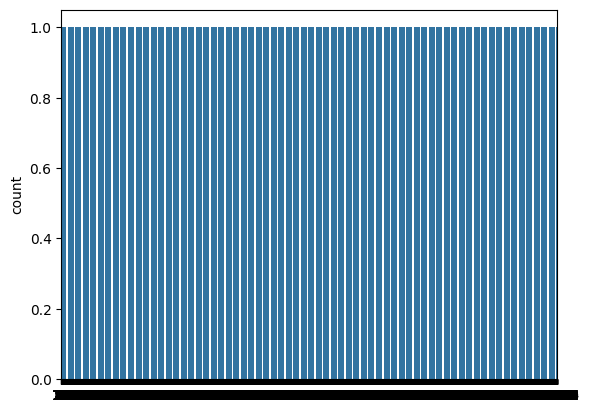

In [ ]:
sns.countplot(df['Time'])

<Axes: >

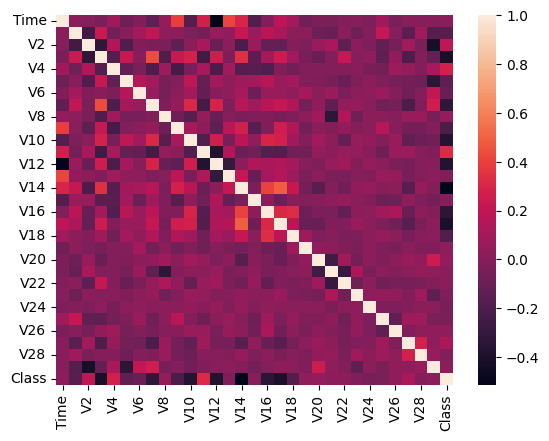

In [ ]:
sns.heatmap(df.corr() )

In [ ]:
for col in df.columns:
    fig = px.histogram(df, x=col, title=f'Distribution of {col}' )
    fig.update_layout(width=800, height=600)
    fig.show()


**Data Preprocessing**

In [ ]:
copy = df.copy()
le= LabelEncoder()

In [ ]:
df['Time'] = le.fit_transform(df['Time'])

In [ ]:
X=df.drop(["Class"] , axis=1)
Y=df['Class']

In [ ]:
X_train,X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

# Oversampling
oversampler = RandomOverSampler()
X_train_over, Y_train_over = oversampler.fit_resample(X_train, Y_train)

# Undersampling
undersampler = RandomUnderSampler()
X_train_under, Y_train_under = undersampler.fit_resample(X_train, Y_train)

**Model Building and Evaluation**

Random Forest

Accuracy: 0.9997611655123

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4168
         1.0       1.00      0.95      0.97        19

    accuracy                           1.00      4187
   macro avg       1.00      0.97      0.99      4187
weighted avg       1.00      1.00      1.00      4187



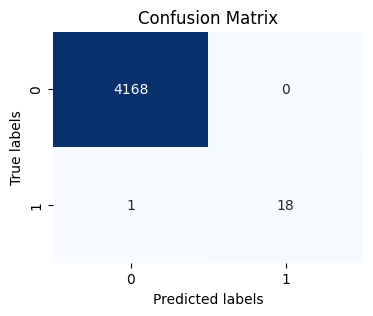

In [ ]:

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, Y_train)
Y_test_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))

# confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

XGBoost Classifier

Accuracy: 0.9997611655123

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4168
         1.0       1.00      0.95      0.97        19

    accuracy                           1.00      4187
   macro avg       1.00      0.97      0.99      4187
weighted avg       1.00      1.00      1.00      4187



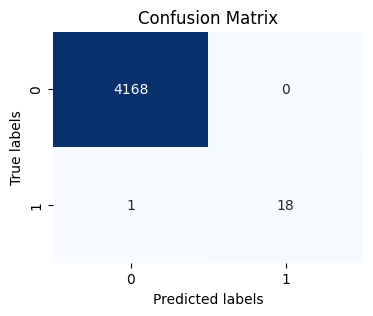

In [ ]:
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train, Y_train)
Y_test_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))

# Print confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression

Accuracy: 0.9983281585860998

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4168
         1.0       1.00      0.63      0.77        19

    accuracy                           1.00      4187
   macro avg       1.00      0.82      0.89      4187
weighted avg       1.00      1.00      1.00      4187



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



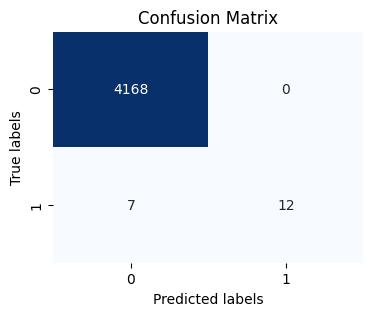

In [ ]:
logistic_classifier = LogisticRegression()

logistic_classifier.fit(X_train, Y_train)
Y_test_pred = logistic_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))

# Print confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Best Model -- RF**

Outliers Checking

*Random Forest with OverSampled Data*

Accuracy: 0.9997611655123

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4168
         1.0       1.00      0.95      0.97        19

    accuracy                           1.00      4187
   macro avg       1.00      0.97      0.99      4187
weighted avg       1.00      1.00      1.00      4187



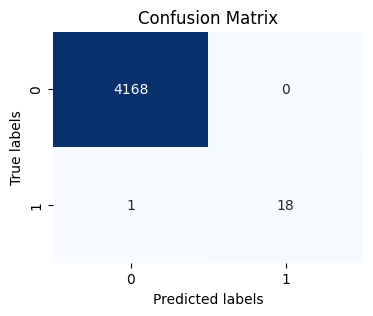

In [ ]:

rf_classifier_over = RandomForestClassifier(n_estimators=100)
rf_classifier_over.fit(X_train_over, Y_train_over)
Y_test_pred = rf_classifier_over.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))

# confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

*Random Forest with UnderSampled Data*

Accuracy: 0.9799379030331979

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4168
         1.0       0.18      1.00      0.31        19

    accuracy                           0.98      4187
   macro avg       0.59      0.99      0.65      4187
weighted avg       1.00      0.98      0.99      4187



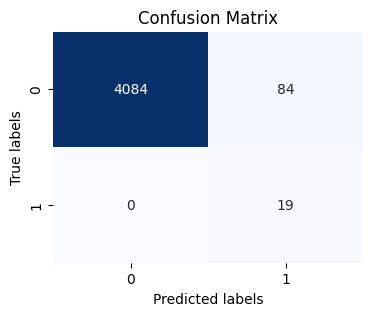

In [ ]:

rf_classifier_under = RandomForestClassifier(n_estimators=100)
rf_classifier_under.fit(X_train_under, Y_train_under)
Y_test_pred = rf_classifier_under.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))

# confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## *Best Model*-- ***Random Forest Classifier***

### *Accuracy* -- ***99.9%***